In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("../data/cleaned_transactions.csv")
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df.head()


,TransactionID,CustomerID,AccountID,AccountType,TransactionType,Product,Firm,Region,Manager,TransactionDate,TransactionAmount,AccountBalance,RiskScore,CreditRating,TenureMonths,Year,Month,YearMonth
0,33,CUST6549,ACC12334,credit,withdrawal,Savings Account,Firm C,Central,Manager 1,2023-10-21,87480.05448,74008.43310,0.729101,319,200,2023,10,2023-10
1,177,CUST2942,ACC52650,credit,withdrawal,Home Loan,Firm A,East,Manager 3,2023-06-20,20315.74505,22715.83590,0.472424,692,47,2023,6,2023-06
2,178,CUST6776,ACC45101,current,deposit,Personal Loan,Firm C,South,Manager 3,2023-01-02,10484.57165,42706.09210,0.648784,543,109,2023,1,2023-01
3,173,CUST2539,ACC88252,current,withdrawal,Mutual Fund,Firm A,Central,Manager 2,2023-07-25,45122.27373,114176.56870,0.734832,430,103,2023,7,2023-07
4,67,CUST2626,ACC21878,savings,withdrawal,Home Loan,Firm C,Central,Manager 4,2023-07-25,42360.79878,17863.02644,0.289304,468,234,2023,7,2023-07


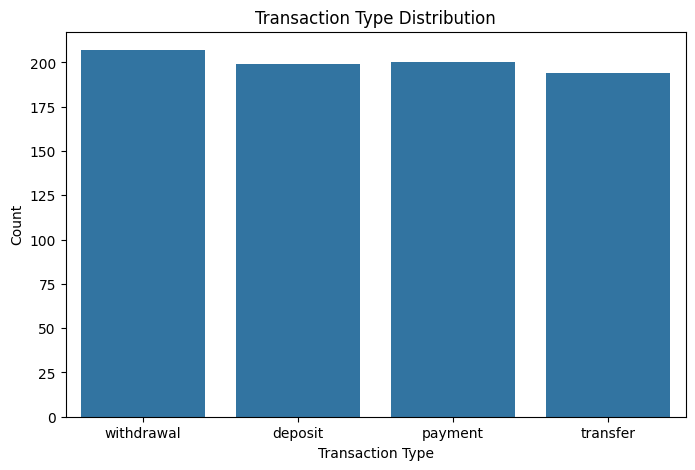

In [ ]:
#VISUAL 1 — TRANSACTION TYPE DISTRIBUTION
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='TransactionType')
plt.title("Transaction Type Distribution")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()


In [4]:
monthly_trend = df.groupby('YearMonth')['TransactionAmount'].sum().reset_index()


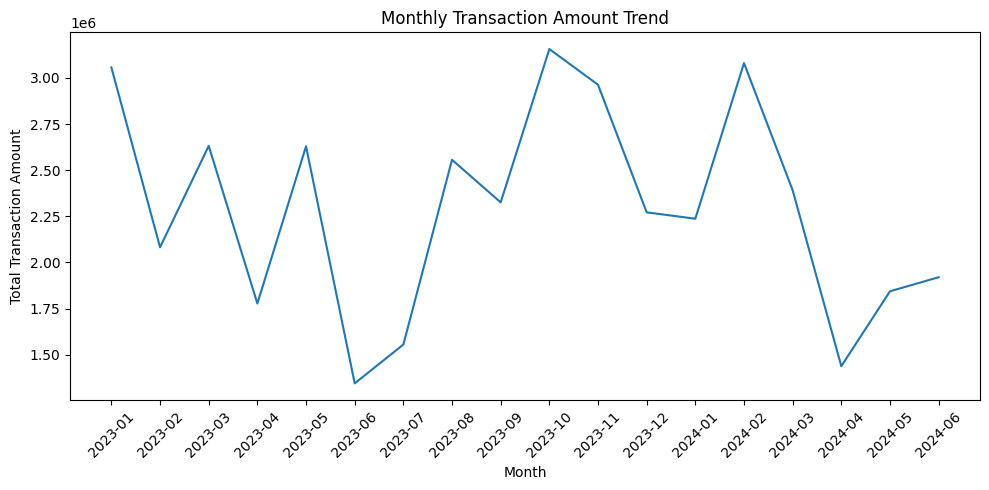

In [5]:
#VISUAL 2 — MONTHLY TRANSACTION TREND
plt.figure(figsize=(10,5))
plt.plot(monthly_trend['YearMonth'].astype(str), monthly_trend['TransactionAmount'])
plt.xticks(rotation=45)
plt.title("Monthly Transaction Amount Trend")
plt.xlabel("Month")
plt.ylabel("Total Transaction Amount")
plt.tight_layout()
plt.show()


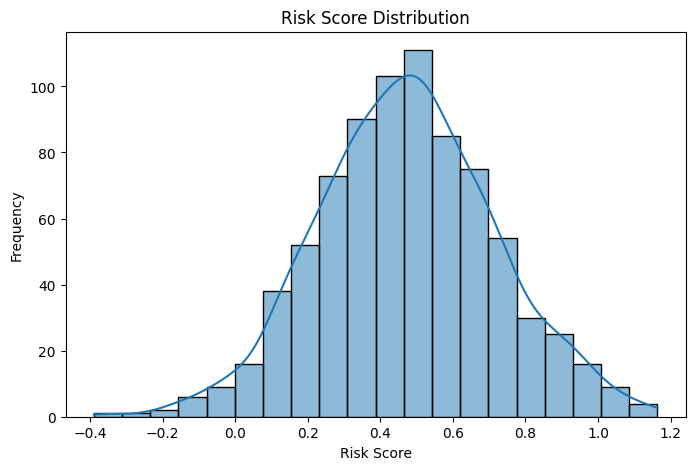

In [6]:
#VISUAL 3 — RISK SCORE DISTRIBUTION
plt.figure(figsize=(8,5))
sns.histplot(df['RiskScore'], bins=20, kde=True)
plt.title("Risk Score Distribution")
plt.xlabel("Risk Score")
plt.ylabel("Frequency")
plt.show()


In [7]:
customer_summary = (
    df
    .groupby('CustomerID')
    .agg(
        Total_Transactions=('TransactionID', 'count'),
        Avg_Balance=('AccountBalance', 'mean')
    )
    .reset_index()
)


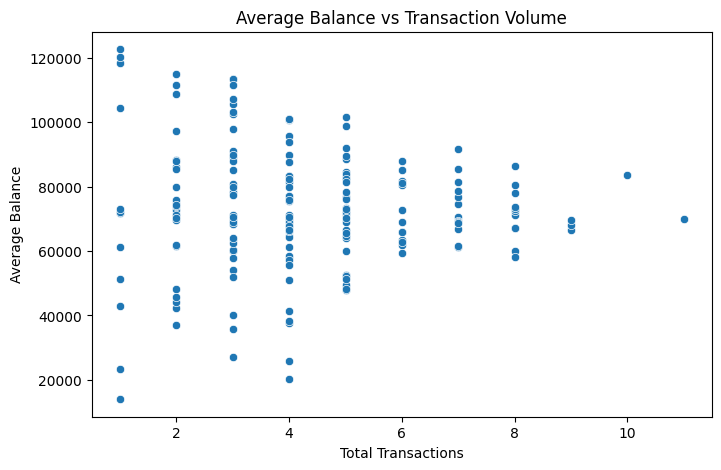

In [8]:
#VISUAL 4 — BALANCE vs TRANSACTION COUNT
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=customer_summary,
    x='Total_Transactions',
    y='Avg_Balance'
)
plt.title("Average Balance vs Transaction Volume")
plt.xlabel("Total Transactions")
plt.ylabel("Average Balance")
plt.show()


## Insights
-Visual analysis revealed clear patterns in transaction types and monthly trends.
Risk score distribution showed most customers fall within moderate risk levels.
Scatter plots indicated that higher transaction activity does not always correlate with higher balances.